<a href="https://colab.research.google.com/github/xvzeng/Data-Science-for-Geochemistry/blob/main/Diamonds_XGboost_CV_AllKnown_Top5Craton_Balance_Predict_Unknown_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamonds_XGBoost_CV_AllKnown_Top5Craton_Balance_Predict_Unknown_Note

By Vivian Zeng

JAN/31/2021

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import matplotlib as mpl
import lightgbm as lgb
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Diamind_XZ_20201215_AllKnown.csv to Diamind_XZ_20201215_AllKnown (1).csv


In [4]:
import io
diamond = pd.read_csv(io.BytesIO(uploaded['Diamind_XZ_20201215_AllKnown.csv']))

In [5]:
diamond.columns

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [6]:
df = diamond.copy()

In [9]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2144, 43)

In [10]:
df.groupby('craton').describe()

Unnamed: 0                                            \
                          count         mean         std     min      25%   
craton                                                                      
Alluvial                   38.0   761.500000   11.113055   743.0   752.25   
Amazonia                  207.0  1055.270531  677.813979     1.0   513.50   
Buffalo Head Terrane        6.0  1434.833333  416.548397  1052.0  1114.25   
Congo                     101.0   899.524752  404.102601   100.0   829.00   
East European              10.0  1524.000000  514.399326  1034.0  1036.25   
Gawler                     17.0  1234.294118  274.371273  1114.0  1118.00   
Guyana                     57.0  1237.070175  432.683894   790.0   984.00   
Kaapvaal                  410.0   517.324390  388.768068    89.0   199.25   
Kalahari                    4.0   980.500000    1.290994   979.0   979.75   
Pohorje                    10.0  1881.900000  406.249089  1084.0  2071.25   
Siberia                   695.0  1468.441727  460.221121    39.0  1435.50   
Slave                     330.0  1335.057576  535.337765    62.0  1048.25   
Superior                   86.0   588.930233  468.682227    79.0   365.25   
Tarim                      12.0  1202.500000    3.605551  1197.0  1199.75   
West Africa                98.0   309.020408   48.662520   257.0   281.25   
Wyoming                    35.0   496.800000   85.166895   466.0   474.50   
Zimbabwe                   28.0  1326.250000  411.258018  1009.0  1015.75   

                                                  Si                        \
                         50%      75%     max  count       mean        std   
craton                                                                       
Alluvial               761.5   770.75   780.0   38.0  20.339523   4.471555   
Amazonia              1290.0  1389.50  2070.0  205.0   9.923860  10.606124   
Buffalo Head Terrane  1298.5  1789.50  1954.0    6.0  20.852371   3.475162   
Congo                  854.0   879.00  2134.0   17.0  27.038099   5.352726   
East European         1524.0  2011.75  2014.0   10.0   9.440734   9.952322   
Gawler                1122.0  1126.00  1941.0   17.0   5.114703   9.670225   
Guyana                1100.0  1317.00  2079.0   55.0  14.504475  10.541092   
Kaapvaal               430.5   710.75  2025.0  409.0  15.522014   9.517352   
Kalahari               980.5   981.25   982.0    1.0  19.508060        NaN   
Pohorje               2073.5  2075.75  2078.0   10.0  23.753503  10.079904   
Siberia               1609.0  1782.50  2144.0  643.0  18.374050   4.795266   
Slave                 1239.5  1963.75  2141.0  308.0  12.277850  10.573502   
Superior               577.5   598.75  2035.0   86.0  18.502706   6.475483   
Tarim                 1202.5  1205.25  1208.0   12.0  24.616843   4.387352   
West Africa            305.5   329.75   699.0   98.0   9.949452  11.242792   
Wyoming                483.0   491.50   983.0   35.0  17.391491   6.533659   
Zimbabwe              1027.5  1431.25  2135.0   28.0   9.370567  11.174485   

                                                                        \
                               min           25%        50%        75%   
craton                                                                   
Alluvial              3.266900e-02  1.915920e+01  19.487059  19.901255   
Amazonia              0.000000e+00  9.333400e-02   0.490003  19.133470   
Buffalo Head Terrane  1.834013e+01  1.851513e+01  18.830134  23.450167   
Congo                 2.053480e+01  2.552849e+01  26.135200  27.115270   
East European         0.000000e+00  0.000000e+00   9.356734  18.783468   
Gawler                3.733360e-03  3.733360e-03   0.009333   0.014000   
Guyana                0.000000e+00  5.133490e-02  18.831345  22.616282   
Kaapvaal              0.000000e+00  0.000000e+00  19.320138  19.903475   
Kalahari              1.950806e+01  1.950806e+01  19.508060  19.508060   
Pohorje               3.733360e

In [11]:
df.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


In [12]:
df.isna().sum().sum()

40261

In [13]:
df=df.drop(df.columns[0], axis=1)

In [14]:
df=df.drop('NAs', axis=1)

In [15]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [16]:
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
Pohorje                  10
East European            10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [17]:
df.craton.nunique()

17

In [18]:
def feature_ratios(a):
    plt.figure(figsize=(16, 10))
    sns.countplot(a, palette="Set2")
    plt.xticks(rotation=45)

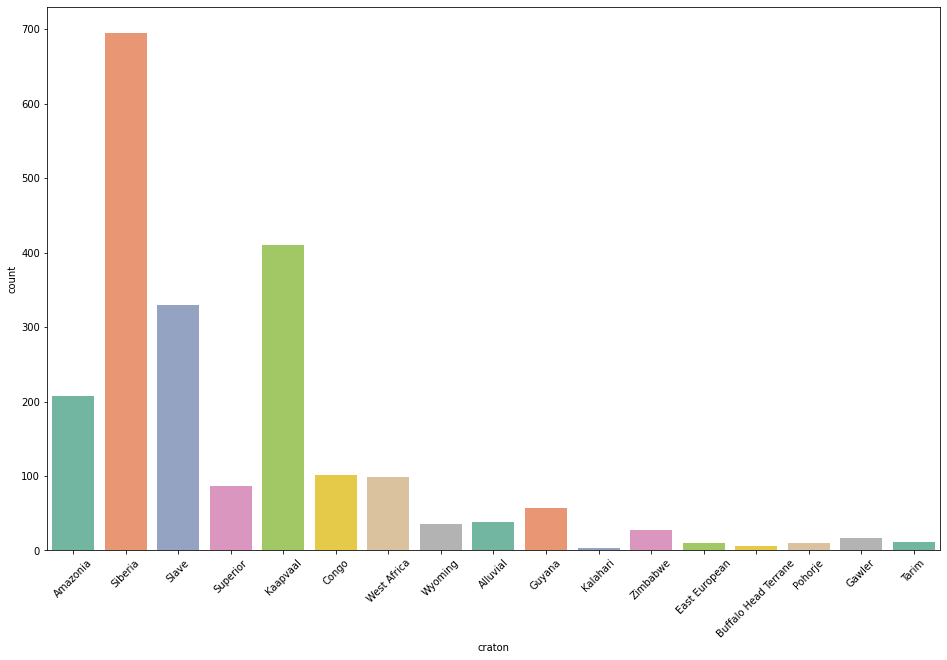

In [19]:
feature_ratios(df.craton)

In [20]:
df_top5= df[df.craton.isin(['Siberia','Kaapvaal','Slave','Amazonia', 'Congo'])]
df_top5.shape

(1743, 41)

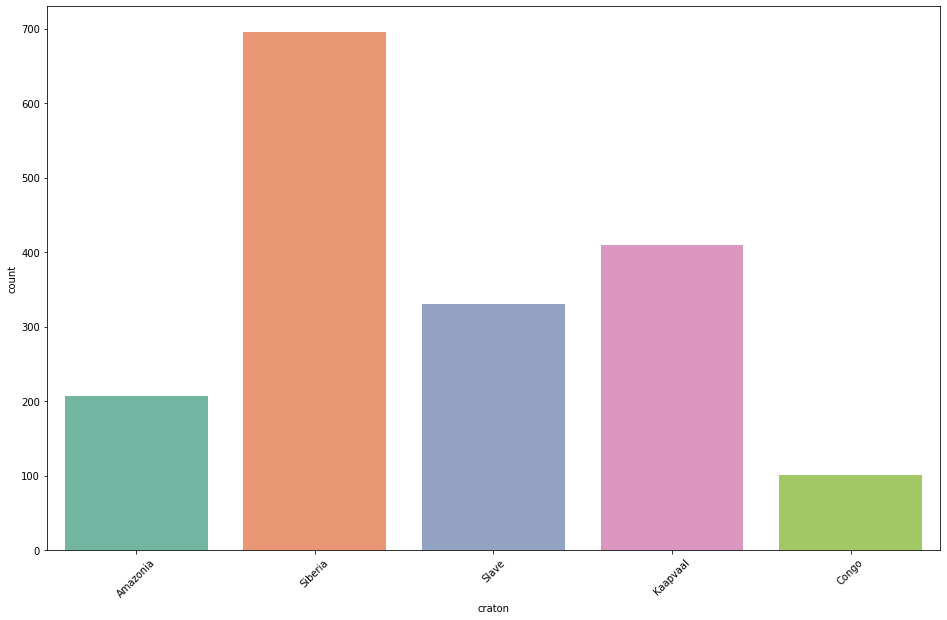

In [21]:
feature_ratios(df_top5.craton)

In [22]:
df_top5.craton=df_top5.craton.astype('category')

In [23]:
df_top5.craton.value_counts()

Siberia     695
Kaapvaal    410
Slave       330
Amazonia    207
Congo       101
Name: craton, dtype: int64

In [24]:
df_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2143
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   craton    1743 non-null   category
 1   Si        1582 non-null   float64 
 2   Ti        1582 non-null   float64 
 3   Al        1582 non-null   float64 
 4   Cr        1582 non-null   float64 
 5   V         1464 non-null   float64 
 6   Mn        1575 non-null   float64 
 7   Mg        1581 non-null   float64 
 8   Ca        1582 non-null   float64 
 9   Sr        1449 non-null   float64 
 10  Ba        1456 non-null   float64 
 11  Na        1576 non-null   float64 
 12  P         1526 non-null   float64 
 13  K         1581 non-null   float64 
 14  Fe        1582 non-null   float64 
 15  Co        1449 non-null   float64 
 16  Ni        1552 non-null   float64 
 17  S         1449 non-null   float64 
 18  Zn        1449 non-null   float64 
 19  Cr_trace  611 non-null    float64 
 20  Co_trace

## Split data into craton and elements

In [25]:
cratons = df_top5.craton.values
cratons=cratons.astype('str')
cratons

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype='<U8')

In [26]:
craton = df_top5.craton.values
craton=cratons.astype('str')
craton

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype='<U8')

In [27]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([0, 0, 0, ..., 3, 3, 3])

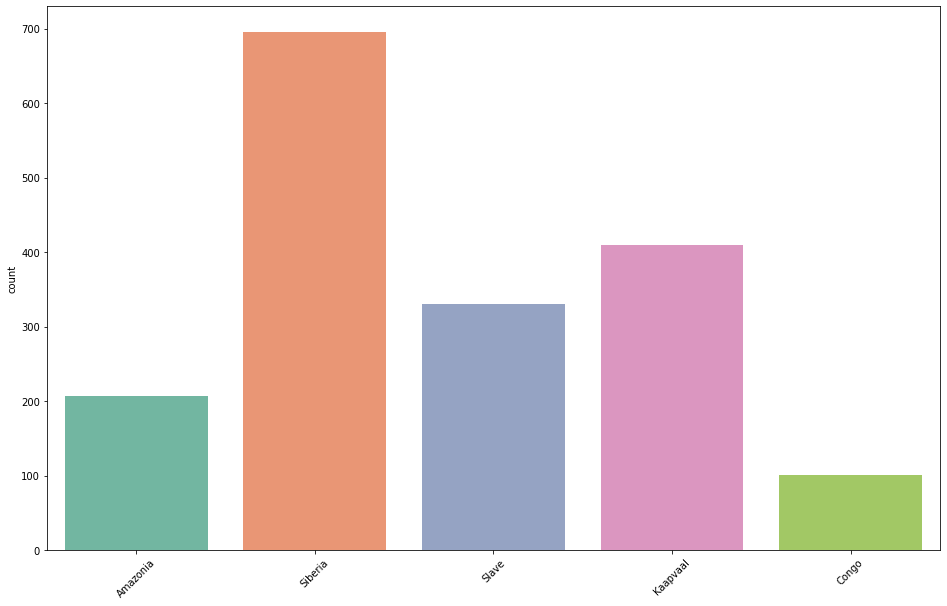

In [28]:
feature_ratios(craton)

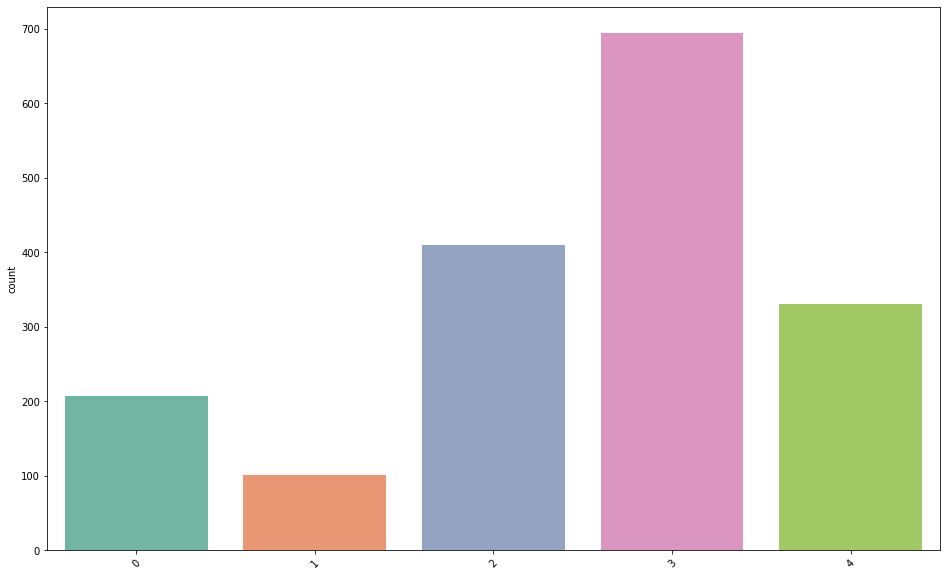

In [29]:
feature_ratios(cratons)

In [30]:
features = df_top5.drop(['craton'], axis=1)
features.shape

(1743, 40)

In [31]:
features.head()
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [32]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    sns.barplot(df_n.index, df_n.Importance, palette="Set2")
    plt.xticks(rotation=45)

In [33]:
def get_metrics(mod, X_train, X_test, y_train, y_test):
    """ Returns a data frame of metrics (precision,
        recall, AUC ROC) from training and test sets.
        Assumes model has decision_function() method.
        This will at least work for SVC, LDA, QDA.
    """
    pred_train = mod.predict(X_train)
    pred_test = mod.predict(X_test)
    recall_train = recall_score(y_train, pred_train,average='weighted')
    recall_test = recall_score(y_test, pred_test, average='weighted')
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred_test, average='weighted')
    #rocauc_train = roc_auc_score(y_train, pred_train, average='weighted', multi_class='ovr')
    #rocauc_test = roc_auc_score(y_test, pred_test,average='weighted',multi_class='ovr')
    metrics = {'Set':['Train', 'Test'],
               'Recall':[recall_train, recall_test],
               'Precision':[precision_train, precision_test],
               #'ROC AUC':[rocauc_train, rocauc_test]}
              }
    return pd.DataFrame(metrics)

## Split into training set and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1394, 40), (349, 40), (1394,), (349,))

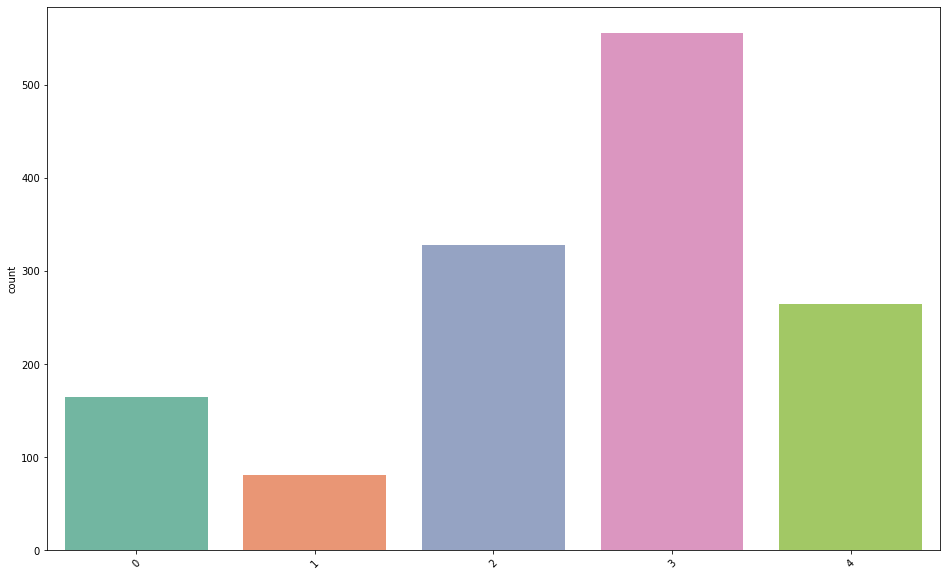

In [35]:
feature_ratios(y_train)

# Oversampling

In [36]:
from imblearn.over_sampling import RandomOverSampler #
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
pd.options.display.max_columns = None # display all columns

In [37]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=2021)

In [40]:
# fit and apply the transform
#X_o_train, y_o_train = oversample.fit_resample(X_train, y_train)

In [47]:
from google.colab import files
uploaded = files.upload()

Saving X_o_train_Top5Craton_Oversampling.csv to X_o_train_Top5Craton_Oversampling.csv


In [48]:
import io
X_o_train = pd.read_csv(io.BytesIO(uploaded['X_o_train_Top5Craton_Oversampling.csv']))

In [51]:
X_o_train.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,3.901361,0.839160,2.006426,0.225786,0.0,0.518848,12.954000,17.457492,0.0,0.0,2.106996,1.060938,4.904059,20.650059,0.000000,0.000000,0.304,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.464946,0.000599,0.005082,0.034894,0.0,0.075117,30.888780,0.018572,0.0,0.0,0.000000,0.000000,0.000000,5.474482,0.013175,0.292038,0.000,0.0,174.471,131.735245,2920.378552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.995,54711.0378,50.81280,185.822000,751.168,310483.7203
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,NaN,2.500000,26.0,4.0,13.0,1.6,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.000,500.0000,NaN,615.000000,2.500,NaN
3,19.154470,0.001798,0.001398,0.018473,0.0,0.076085,30.623593,0.012420,0.0,0.0,0.000000,0.000000,0.000000,5.676472,0.000000,0.292612,0.000,0.0,92.367,NaN,2926.122750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.985,56729.6859,13.97352,124.272036,760.848,307818.1450
4,27.066860,0.000000,13.658520,0.000000,0.0,0.000000,0.000000,2.071470,0.0,0.0,0.000000,0.000000,1.742559,2.022228,0.000000,1.100120,1.240,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
from google.colab import files
uploaded = files.upload()

Saving y_o_train_Top5Craton_Oversampling.csv to y_o_train_Top5Craton_Oversampling (1).csv


In [103]:
import io
y_o_train = pd.read_csv(io.BytesIO(uploaded['y_o_train_Top5Craton_Oversampling.csv']))

# XGBoost Base Model

In [52]:
xgb0 = XGBClassifier(objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
xgb0.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)

     Set    Recall  Precision
0  Train  0.990204   0.990228
1   Test  0.979943   0.980511


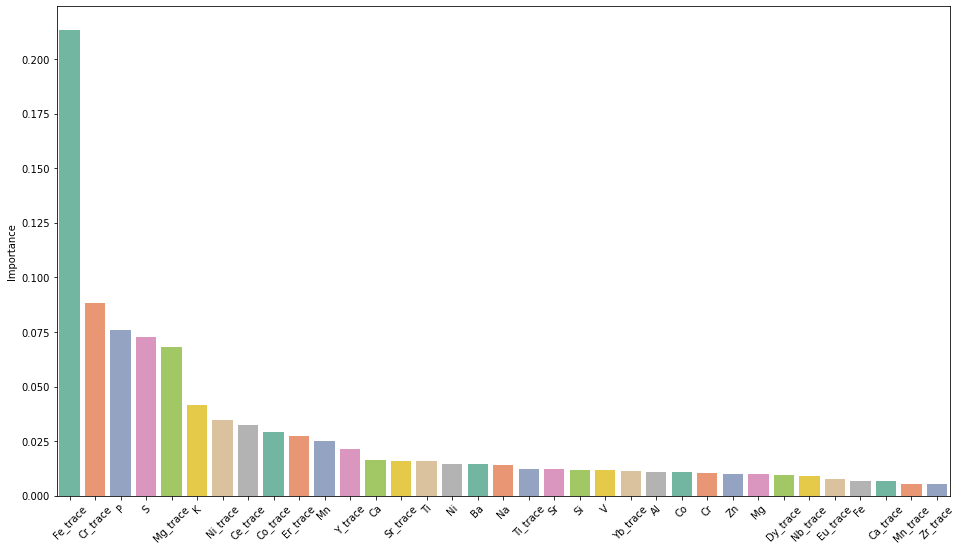

In [54]:
print(get_metrics(xgb0, X_o_train, X_test, y_o_train, y_test))
plot_importance(features, xgb0, 35)

# Optimize Model

# Step1. Initial boosting 


In [55]:
xgb1 = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=500,
                     max_depth=5, 
                     min_child_weight=1, 
                     #gamma=0,
                     #subsample=0.8,
                     #colsample_bytree=0.8,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
xgb1.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)

     Set    Recall  Precision
0  Train  1.000000    1.00000
1   Test  0.988539    0.98855


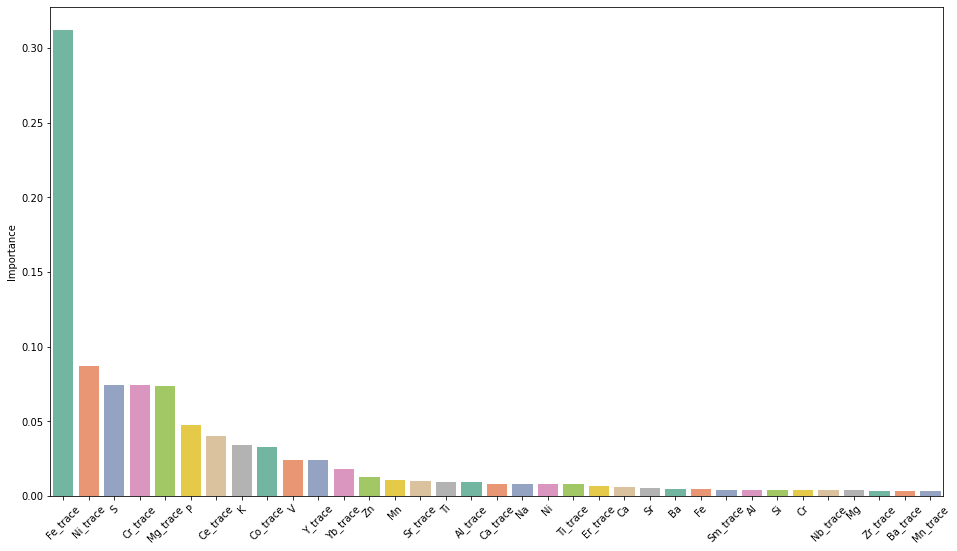

In [56]:
print(get_metrics(xgb1, X_o_train, X_test, y_o_train, y_test))
plot_importance(features, xgb1, 35)

# Step2. max_depth min_weight, grid search, GCB

In [57]:
params_test1 = {
    'max_depth': [2,3,4,5],
    'min_child_weight':[ 0.5, 1, 2, 3]}

In [58]:
gsearch1 = GridSearchCV(estimator=xgb1,
                        param_grid=params_test1,
                        scoring='accuracy', 
                        cv=5)

In [59]:
gsearch1.fit(X_o_train, y_o_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=5,
                                     min_child_weight=1, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=None,
                                     num_class=5, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=2021, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [0.5, 1, 

In [60]:
print('best_params:{0}'.format(gsearch1.best_params_))
print('best_score:{0}'.format(gsearch1.best_score_))
print('best_estimator:{0}'.format(gsearch1.best_estimator_))
bgm_best1 = gsearch1.best_estimator_

best_params:{'max_depth': 4, 'min_child_weight': 1}
best_score:0.9862875561183377
best_estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)


# Step 3: gamma

In [61]:
params_test3 = {'gamma':[0, 0.01, 0.02, 0.05]}
xgb2 = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=500,
                     max_depth=4, 
                     min_child_weight=1,
                     #gamma=0,
                     #subsample=0.8,
                     #colsample_bytree=0.8,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
gsearch3 = GridSearchCV(estimator=xgb2 ,
                        param_grid=params_test3,
                        scoring='accuracy', 
                        cv=5)
gsearch3.fit(X_o_train, y_o_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=None,
                                     num_class=5, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=2021, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0, 0.01, 0.02, 0.05]},
             pre_dispatch='2*n_jobs', refit=True,

In [62]:
print('best_params:{0}'.format(gsearch3.best_params_))
print('best_score:{0}'.format(gsearch3.best_score_))
print('best_estimator:{0}'.format(gsearch3.best_estimator_))
bgm_best3 = gsearch3.best_estimator_

best_params:{'gamma': 0}
best_score:0.9862875561183377
best_estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)


# Step 4: subsample & colsample_bytree




In [65]:
params_test4 = {
    'subsample':[i/10.0 for i in range(3,6)],
    'colsample_bytree':[i/10.0 for i in range(7,11)]
}
xgb3 = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=500,
                     max_depth=4, 
                     min_child_weight=1,
                     gamma=0,
                     #subsample=0.8,
                     #colsample_bytree=0.8,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
gsearch4 = GridSearchCV(estimator=xgb3 ,
                        param_grid=params_test4,
                        scoring='accuracy', 
                        cv=5)
gsearch4.fit(X_o_train, y_o_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=None,
                                     num_class=5, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=2021, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'subsample': [0

In [66]:
print('best_params:{0}'.format(gsearch4.best_params_))
print('best_score:{0}'.format(gsearch4.best_score_))
print('best_estimator:{0}'.format(gsearch4.best_estimator_))
bgm_best4 = gsearch4.best_estimator_

best_params:{'colsample_bytree': 0.9, 'subsample': 0.4}
best_score:0.9851110855301025
best_estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=0.4, verbosity=1)


# Step 5: L1, L2 regulations



In [68]:
params_test5 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01],
    'reg_lambda':[0, 0.001, 0.005, 0.01]
}
xgb5 = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=500,
                     max_depth=4, 
                     min_child_weight=1,
                     gamma=0,
                     #subsample=0.9,
                     #colsample_bytree=0.4,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
gsearch5 = GridSearchCV(estimator=xgb5 ,
                        param_grid=params_test5,
                        scoring='accuracy', 
                        cv=5)
gsearch5.fit(X_o_train, y_o_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=None,
                                     num_class=5, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=2021, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01],
                         'reg_lambda': [0, 0

In [69]:
print('best_params:{0}'.format(gsearch5.best_params_))
print('best_score:{0}'.format(gsearch5.best_score_))
print('best_estimator:{0}'.format(gsearch5.best_estimator_))
bgm_best5 = gsearch5.best_estimator_

best_params:{'reg_alpha': 0.001, 'reg_lambda': 0}
best_score:0.9878546487087986
best_estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0.001, reg_lambda=0, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)


# Step6: Reduce learning_rate

In [72]:
params_test6={
    'n_estimators': range(300, 700, 100)
}
xgb6 = XGBClassifier(learning_rate = 0.05, 
                     n_estimators=500,
                     max_depth=4, 
                     min_child_weight=1,
                     gamma=0,
                     reg_alpha = 0.001,
                     #subsample=0.8,
                     #colsample_bytree=0.8,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
gsearch6 = GridSearchCV(estimator=xgb6 ,
                        param_grid=params_test6,
                        scoring='accuracy', 
                        cv=5)
gsearch6.fit(X_o_train, y_o_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, learning_rate=0.05,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=1, missing=None,
                                     n_estimators=500, n_jobs=1, nthread=None,
                                     num_class=5, objective='multi:softmax',
                                     random_state=0, reg_alpha=0.001,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=2021, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(300, 700, 100)},
 

In [73]:
print('best_params:{0}'.format(gsearch6.best_params_))
print('best_score:{0}'.format(gsearch6.best_score_))
print('best_estimator:{0}'.format(gsearch6.best_estimator_))
bgm_best6 = gsearch6.best_estimator_

best_params:{'n_estimators': 500}
best_score:0.9862875561183377
best_estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)


**May not use lower learning rate since score decreased**

# Get the optimzed model

In [78]:
xgb_best = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=500,
                     max_depth=4, 
                     min_child_weight=1,
                     gamma=0,
                     reg_alpha = 0.001,
                     #subsample=0.8,
                     #colsample_bytree=0.8,
                     objective='multi:softmax', 
                     num_class = 5, 
                     eval_metric = 'merror', 
                     seed=2021)
xgb_best.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
              seed=2021, silent=None, subsample=1, verbosity=1)

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.991404   0.991526


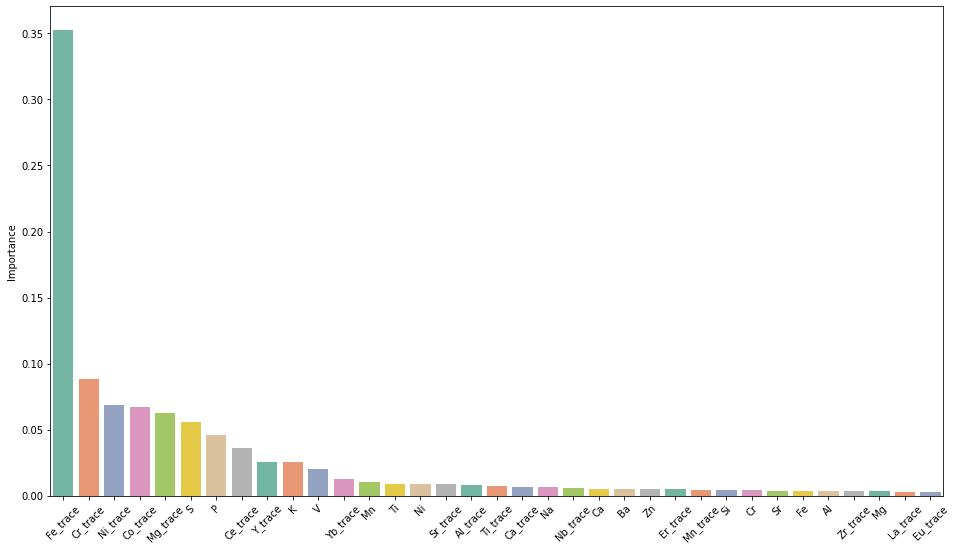

In [79]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))
plot_importance(features, xgb_best, 35)

# Predict Unknown
### Assume all samples are from Top 5 Craton
## Get and pre-process the unknow dataset

In [80]:
from google.colab import files
uploaded = files.upload()

Saving Diamind_XZ_20201216_Unknown.csv to Diamind_XZ_20201216_Unknown.csv


In [81]:
import io
df_pre = pd.read_csv(io.BytesIO(uploaded['Diamind_XZ_20201216_Unknown.csv']))

In [82]:
df_pre.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


In [83]:
uk = df_pre.copy()
uk.shape

(2162, 43)

In [84]:
uk.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [85]:
uk.drop(uk.columns[uk.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
uk.shape

(2162, 43)

In [86]:
uk=uk.drop(uk.columns[0], axis=1)

In [87]:
uk=uk.drop('NAs', axis=1)

In [88]:
uk.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [89]:
preds=uk.loc[(uk['craton']=='Unknown')].drop(['craton'], axis=1)

In [90]:
preds.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2.0,12.0,51.0,520.0,48.0,68.0,21.0,2.0,0.4,0.5,0.19,0.14,390.0,NaN,NaN,4000.0,NaN,NaN
334,18.666800,1.078920e+00,5.029300,0.000000e+00,0.0,9.292800e-02,3.240,15.571740,0.0,0.0,2.077320e+00,0.760077,4.978740e+00,0.000000,0.0,0.000000,0.0,0.0,1111.0,NaN,NaN,4389.0,165.0,967.0,413.0,6658.0,990.0,2067.0,813.0,116.0,32.0,63.0,49.00,26.00,NaN,NaN,NaN,NaN,NaN,NaN
501,19.362138,5.994000e-07,0.121762,6.842000e-07,NaN,7.744000e-07,30.066,0.171432,NaN,NaN,7.419000e-07,NaN,8.301000e-07,4.791125,NaN,0.227882,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,19.632807,5.994000e-07,0.079410,6.842000e-07,NaN,7.744000e-07,30.252,0.135717,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.234459,NaN,0.282888,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,19.628140,5.994000e-07,9.110974,6.034644e+00,NaN,2.168320e-01,12.798,2.757198,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.016681,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
preds.shape

(18, 40)

In [92]:
preds.isnull().sum().sum() /(preds.shape[0]* preds.shape[1])

0.5319444444444444

# Predicting based on oversampling

In [93]:
uk_preds = xgb_best.predict(preds)
uk_preds

array([4, 0, 4, 4, 2, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4])

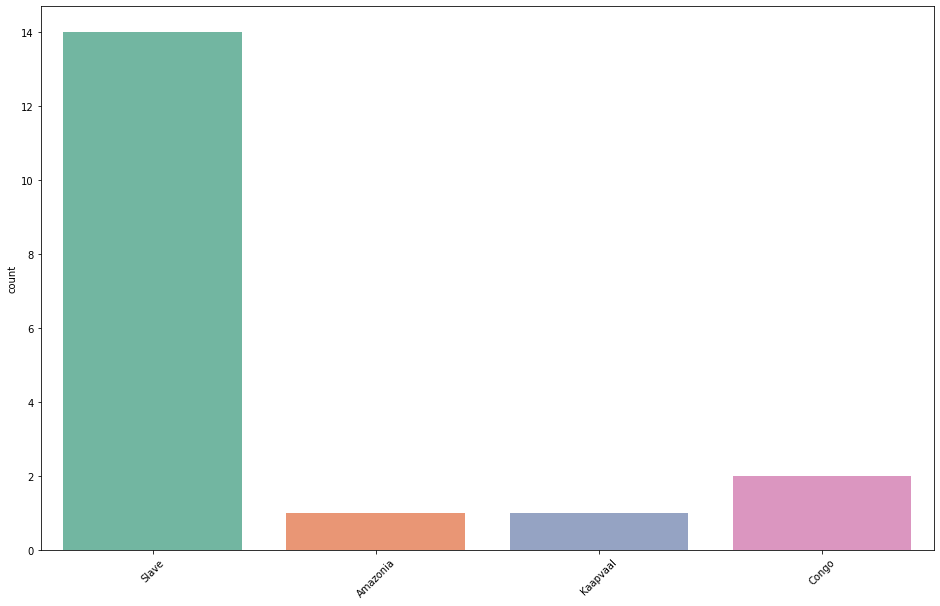

In [94]:
feature_ratios(le.inverse_transform(uk_preds))

In [95]:
le.inverse_transform(uk_preds)

array(['Slave', 'Amazonia', 'Slave', 'Slave', 'Kaapvaal', 'Slave',
       'Congo', 'Slave', 'Slave', 'Slave', 'Congo', 'Slave', 'Slave',
       'Slave', 'Slave', 'Slave', 'Slave', 'Slave'], dtype='<U8')

In [96]:
results=preds.copy()

In [97]:
results['craton_pred']=le.inverse_transform(uk_preds)

In [98]:
results.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,craton_pred
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2.0,12.0,51.0,520.0,48.0,68.0,21.0,2.0,0.4,0.5,0.19,0.14,390.0,NaN,NaN,4000.0,NaN,NaN,Slave
334,18.666800,1.078920e+00,5.029300,0.000000e+00,0.0,9.292800e-02,3.240,15.571740,0.0,0.0,2.077320e+00,0.760077,4.978740e+00,0.000000,0.0,0.000000,0.0,0.0,1111.0,NaN,NaN,4389.0,165.0,967.0,413.0,6658.0,990.0,2067.0,813.0,116.0,32.0,63.0,49.00,26.00,NaN,NaN,NaN,NaN,NaN,NaN,Amazonia
501,19.362138,5.994000e-07,0.121762,6.842000e-07,NaN,7.744000e-07,30.066,0.171432,NaN,NaN,7.419000e-07,NaN,8.301000e-07,4.791125,NaN,0.227882,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slave
502,19.632807,5.994000e-07,0.079410,6.842000e-07,NaN,7.744000e-07,30.252,0.135717,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.234459,NaN,0.282888,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slave
503,19.628140,5.994000e-07,9.110974,6.034644e+00,NaN,2.168320e-01,12.798,2.757198,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.016681,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaapvaal


In [99]:
# move 'craton_pred' to top of the dataframe
craton_pred = results['craton_pred']
results.drop(labels=['craton_pred'], axis=1,inplace = True)
results.insert(0, 'craton_pred', craton_pred)
results

,craton_pred,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
78,Slave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2.000,12.00,51.00,520.0,48.000,68.000,21.000,2.000,0.400,0.500,0.190000,0.14,390.000,NaN,NaN,4000.000,NaN,NaN
334,Amazonia,18.666800,1.078920e+00,5.029300e+00,0.000000e+00,0.0,9.292800e-02,3.240,1.557174e+01,0.0,0.0,2.077320e+00,0.760077,4.978740e+00,0.000000,0.0,0.000000e+00,0.0,0.0,1111.000,NaN,NaN,4389.0,165.000,967.00,413.00,6658.0,990.000,2067.000,813.000,116.000,32.000,63.000,49.000000,26.00,NaN,NaN,NaN,NaN,NaN,NaN
501,Slave,19.362138,5.994000e-07,1.217620e-01,6.842000e-07,NaN,7.744000e-07,30.066,1.714320e-01,NaN,NaN,7.419000e-07,NaN,8.301000e-07,4.791125,NaN,2.278820e-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,Slave,19.632807,5.994000e-07,7.941000e-02,6.842000e-07,NaN,7.744000e-07,30.252,1.357170e-01,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.234459,NaN,2.828880e-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,Kaapvaal,19.628140,5.994000e-07,9.110974e+00,6.034644e+00,NaN,2.168320e-01,12.798,2.757198e+00,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.016681,NaN,0.000000e+00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,Slave,0.000000,8.391600e-02,2.826996e+00,4.445247e+01,NaN,7.744000e-07,7.290,7.143000e-07,NaN,NaN,7.419000e-07,NaN,8.301000e-07,13.113371,NaN,1.885920e-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Congo,26.138187,5.994000e-07,1.688786e+00,1.094720e-01,NaN,7.744000e-07,9.810,1.087165e+01,NaN,NaN,1.446705e+00,NaN,8.301000e-07,5.390015,NaN,7.858000e-07,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,Slave,18.741467,5.994000e-07,5.294000e-07,6.842000e-07,NaN,7.744000e-07,29.190,7.143000e-02,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.631127,0.0,3.693260e-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,Slave,0.000000,1.078920e-01,2.636412e+00,4.537614e+01,NaN,7.744000e-07,7.800,7.143000e-07,NaN,NaN,7.419000e-07,NaN,8.301000e-07,11.472255,0.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,Slave,0.000000,1.198800e-01,2.535826e+00,4.615613e+01,NaN,0.000000e+00,7.848,0.000000e+00,NaN,NaN,0.000000e+00,NaN,8.301000e-07,11.495588,0.0,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
uk_preds_1 = xgb1.predict(preds)
uk_preds_1

array([4, 0, 4, 4, 2, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4])

In [101]:
uk_preds-uk_preds_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Best model predicts the same as xgb1 for this unknown data.**